In [1]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
from pyramid.arima import auto_arima
warnings.filterwarnings ('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [3]:
data=pd.read_csv("D:\\bse.csv")

In [4]:
data.head()
data.tail()
data.shape
data.describe()
data.info()

,Date,Close
0,27-10-2017,33157.21875
1,30-10-2017,33266.16016
2,31-10-2017,33213.12891
3,01-11-2017,33600.26953
4,02-11-2017,33573.21875


,Date,Close
243,22-10-2018,34134.37891
244,23-10-2018,33847.23047
245,24-10-2018,34033.96094
246,25-10-2018,33690.08984
247,26-10-2018,33349.30859


(248, 2)

,Close
count,248.000000
mean,35021.698944
std,1580.858219
min,32596.539060
25%,33776.699222
50%,34745.369145
75%,35967.671875
max,38896.628910


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
Date     248 non-null object
Close    248 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [9]:
day =pd.date_range('20171027', periods=248, freq='D')
day

DatetimeIndex(['2017-10-27', '2017-10-28', '2017-10-29', '2017-10-30',
               '2017-10-31', '2017-11-01', '2017-11-02', '2017-11-03',
               '2017-11-04', '2017-11-05',
               ...
               '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25',
               '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
               '2018-06-30', '2018-07-01'],
              dtype='datetime64[ns]', length=248, freq='D')

In [11]:
data['datestamp'] = day
data.head()

,Close,datestamp
Date,,
27-10-2017,33157.21875,2017-10-27
30-10-2017,33266.16016,2017-10-28
31-10-2017,33213.12891,2017-10-29
01-11-2017,33600.26953,2017-10-30
02-11-2017,33573.21875,2017-10-31


In [12]:
data1 = data.loc[:,('datestamp', 'Close')]
data1.head()

,datestamp,Close
Date,,
27-10-2017,2017-10-27,33157.21875
30-10-2017,2017-10-28,33266.16016
31-10-2017,2017-10-29,33213.12891
01-11-2017,2017-10-30,33600.26953
02-11-2017,2017-10-31,33573.21875


In [13]:
data1.describe()

,Close
count,248.000000
mean,35021.698944
std,1580.858219
min,32596.539060
25%,33776.699222
50%,34745.369145
75%,35967.671875
max,38896.628910


In [14]:
data1.set_index('datestamp', inplace=True)
data1.head()

,Close
datestamp,
2017-10-27,33157.21875
2017-10-28,33266.16016
2017-10-29,33213.12891
2017-10-30,33600.26953
2017-10-31,33573.21875


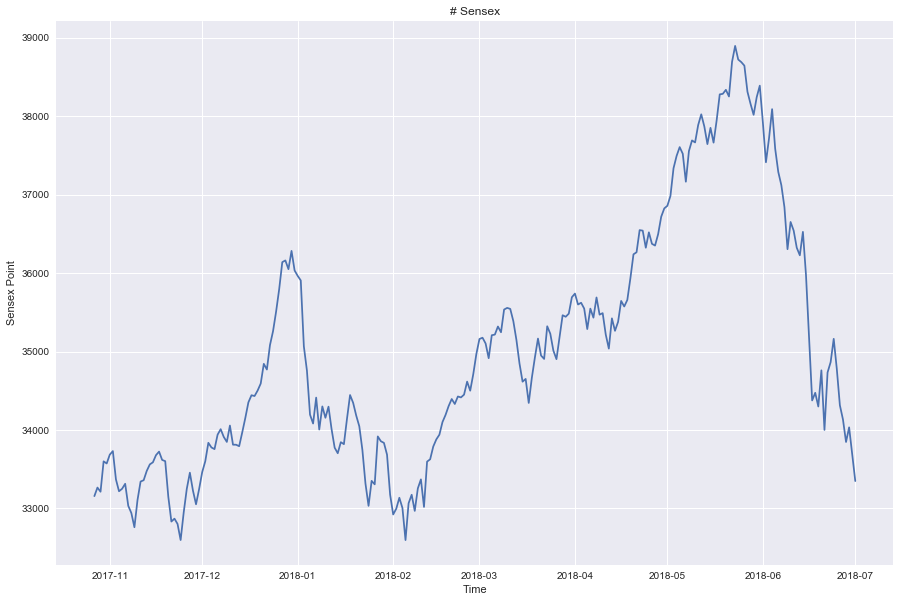

In [15]:
plt.figure(figsize=(15,10))
plt.plot(data1.Close)
plt.xlabel('Time')
plt.ylabel('Sensex Point')
plt.title('# Sensex')
plt.show;

In [17]:
decomposition = seasonal_decompose(data1, model ='additive')
decomposition

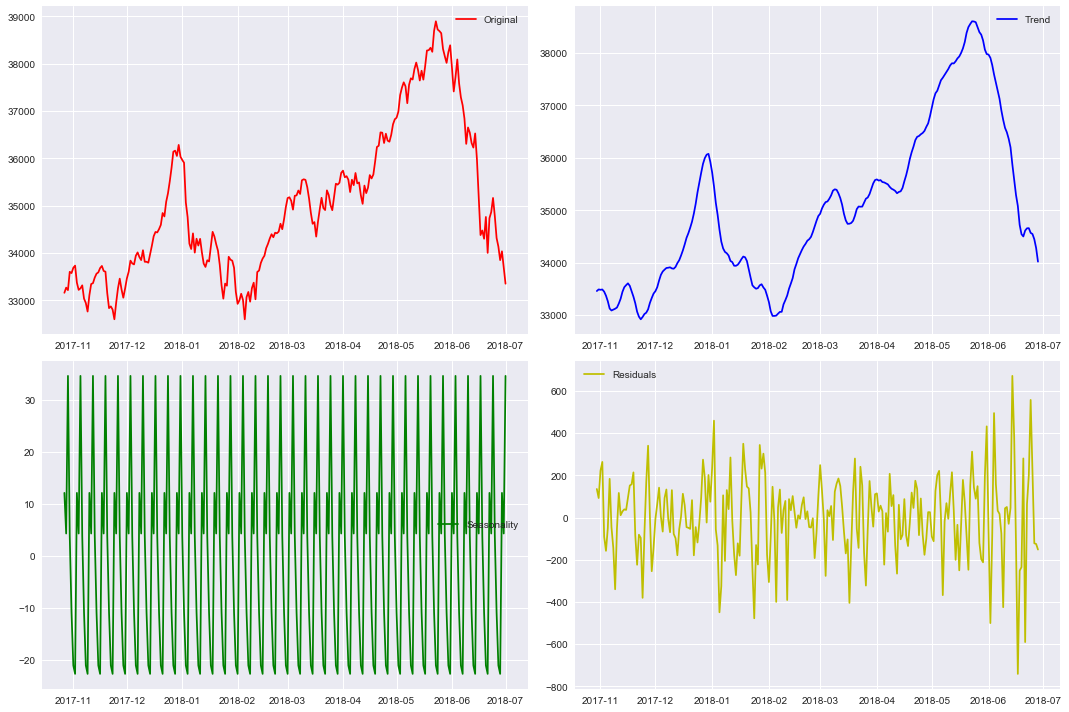

In [18]:
plt.figure(figsize=(15,10))

trend = decomposition.trend
seasonal=decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data1,'r', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,'g', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [19]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(data1)

(0.02269478349621834, True)

In [20]:
#Train and test cannot be 70/30 as it is time sensitive data
#If we do 70/30 split, the data can be jumbled and will have missing periods
#0 to 99 is training and 100 to 144 is test
train, test = data1[:200], data1[200:]
test.shape

(48, 1)

In [21]:
train.shape

(200, 1)

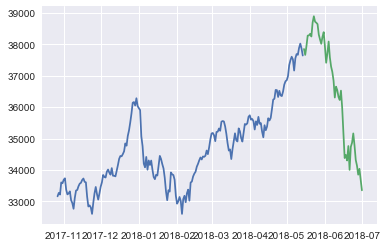

In [22]:
plt.plot(train)
plt.plot(test)
plt.show();

In [23]:
#fitting a step by step model:
from pyramid.arima import auto_arima

Arima_model = auto_arima(train, start_p=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=1,
                        seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True,
                        stepwise=True, random_state=20, n_fits=30)
Arima_model.summary()

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=2721.256, BIC=2737.723, Fit time=0.208 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=2718.361, BIC=2724.948, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=2718.395, BIC=2728.275, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=2718.542, BIC=2728.422, Fit time=0.081 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=2719.501, BIC=2732.674, Fit time=0.121 seconds
Total fit time: 0.454 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1357.181
Date:                Sat, 27 Oct 2018   AIC                           2718.361
Time:                        16:09:56   BIC                           2724.948
Sample:                             0   HQIC                          2721.027
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.5512     16.106      1.400      0.161      -9.016      54.118
sigma2      4.913e+04   4523.281     10.861      0.000    4.03e+04     5.8e+04
===================================================================================
Ljung-Box (Q):                       51.09   Jarque-Bera (JB):                 5.99
Prob(Q):                              0.11   Prob(JB):                         0.05
Heteroskedasticity (H):               1.17   Skew:                            -0.35
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
prediction = pd.DataFrame(Arima_model.predict(n_periods=48), index=test.index)
prediction.columns=['Predicted_SensexPoint']
prediction

,Predicted_SensexPoint
datestamp,
2018-05-15,37667.449594
2018-05-16,37690.000748
2018-05-17,37712.551903
2018-05-18,37735.103057
2018-05-19,37757.654211
2018-05-20,37780.205365
2018-05-21,37802.756520
2018-05-22,37825.307674
2018-05-23,37847.858828


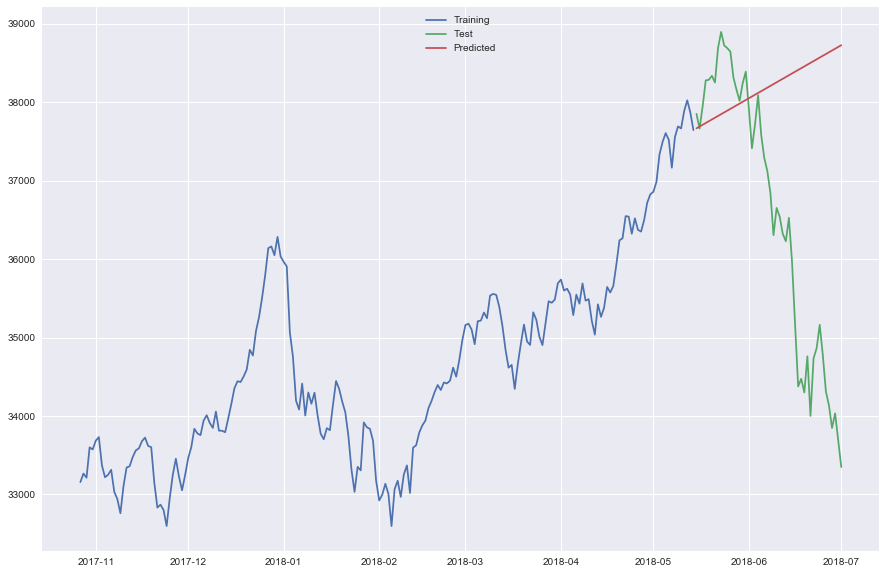

In [25]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(test,label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc='upper center')
plt.show();

In [26]:
test['Predicted_Points'] = prediction
test['Error'] = test['Close'] - test['Predicted_Points']
test

,Close,Predicted_Points,Error
datestamp,,,
2018-05-15,37852.00000,37667.449594,184.550406
2018-05-16,37663.55859,37690.000748,-26.442158
2018-05-17,37947.87891,37712.551903,235.327007
2018-05-18,38278.75000,37735.103057,543.646943
2018-05-19,38285.75000,37757.654211,528.095789
2018-05-20,38336.76172,37780.205365,556.556355
2018-05-21,38251.80078,37802.756520,449.044260
2018-05-22,38694.10938,37825.307674,868.801706
2018-05-23,38896.62891,37847.858828,1048.770082


In [27]:
metrics.mean_absolute_error(test.Close, test.Predicted_Points)

1949.1453814425731

In [28]:
metrics.mean_squared_error(test.Close, test.Predicted_Points)

6706366.9636394233

In [29]:
metrics.median_absolute_error(test.Close, test.Predicted_Points)

1215.9915634170065

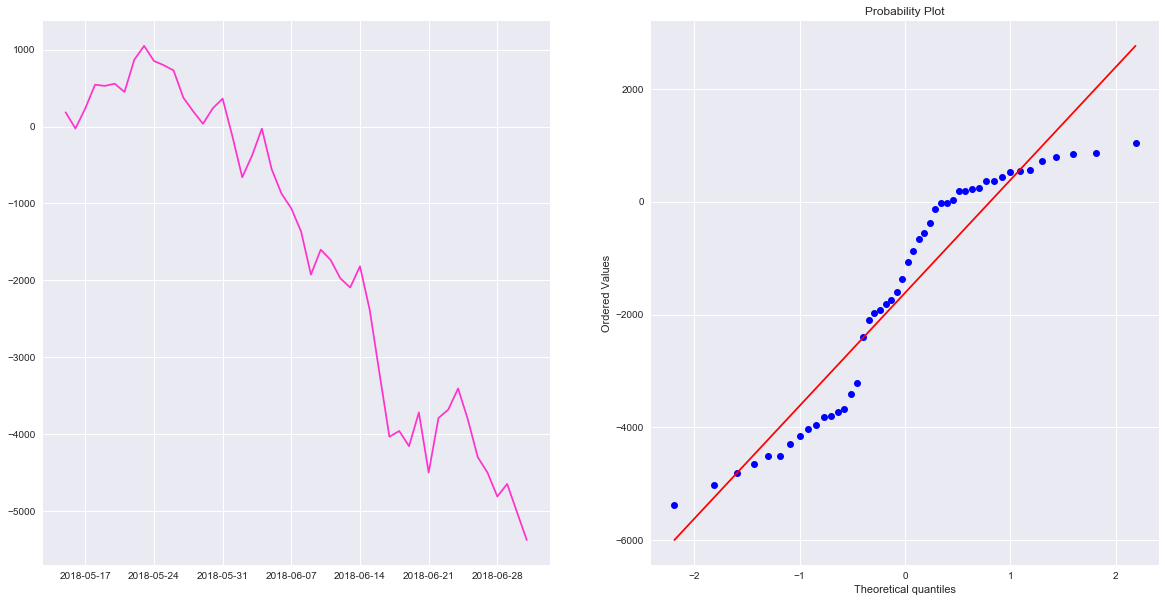

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error, color='#ff33CC')
plt.subplot(122)
scipy.stats.probplot(test.Error, plot=plt)
plt.show;

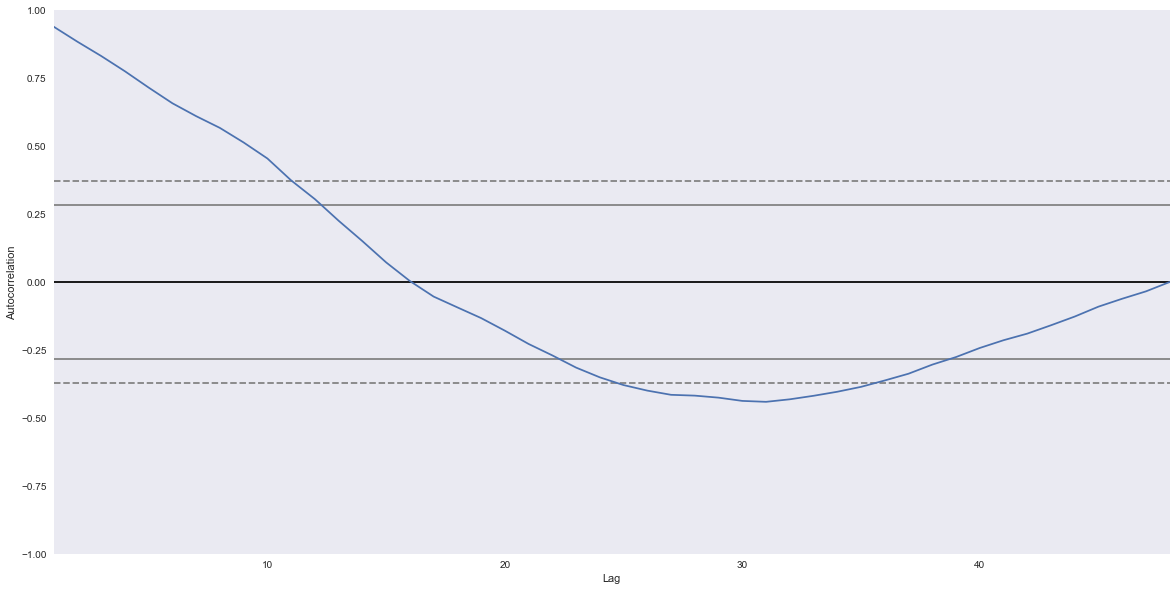

In [31]:
plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show();